<a href="https://colab.research.google.com/github/stevengregori92/Learn-XGBoost-with-Feature-Importance/blob/main/Training_with_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.4 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=8aa846afcbd3e8eda2d5a878e5dcd9acb0ac799a5e05df73bf1d085ea3b644bd
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=fd17eb3ad43742ec9f3140afc4f2fc3672389a47713f3a36876ba4cd8e06c1dc
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [27]:
!unzip /content/air.zip

Archive:  /content/air.zip
replace AQI and Lat Long of Countries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Import Dataset

In [28]:
data = pd.read_csv('AQI and Lat Long of Countries.csv')
data

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


#Explore Data

,missing_value,%
Country,302,1.81
City,0,0.00
AQI Value,0,0.00
AQI Category,0,0.00
CO AQI Value,0,0.00
CO AQI Category,0,0.00
Ozone AQI Value,0,0.00
Ozone AQI Category,0,0.00
NO2 AQI Value,0,0.00
NO2 AQI Category,0,0.00


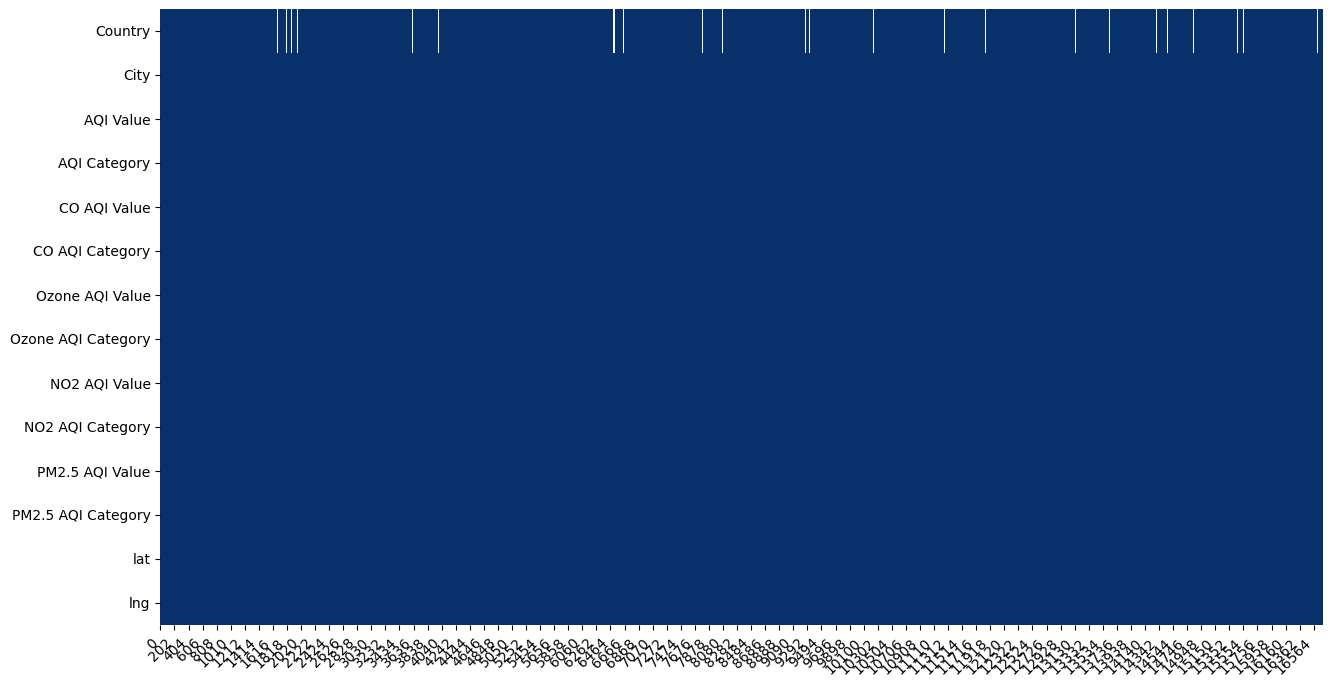

In [29]:
plot_missing_value(data, return_df=True)

In [30]:
data['AQI Value'].sort_values()

6610       7
16559      8
10496      8
5451       9
6884      10
        ... 
14080    500
1623     500
578      500
9220     500
3769     500
Name: AQI Value, Length: 16695, dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


#Dataset Splitting

In [32]:
X = data.drop(['AQI Value'], axis =1)
y = data['AQI Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13356, 13), (3339, 13), (13356,), (3339,))

#Training

In [33]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13356 entries, 408 to 15795
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             13113 non-null  object 
 1   City                13356 non-null  object 
 2   AQI Category        13356 non-null  object 
 3   CO AQI Value        13356 non-null  int64  
 4   CO AQI Category     13356 non-null  object 
 5   Ozone AQI Value     13356 non-null  int64  
 6   Ozone AQI Category  13356 non-null  object 
 7   NO2 AQI Value       13356 non-null  int64  
 8   NO2 AQI Category    13356 non-null  object 
 9   PM2.5 AQI Value     13356 non-null  int64  
 10  PM2.5 AQI Category  13356 non-null  object 
 11  lat                 13356 non-null  float64
 12  lng                 13356 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.4+ MB


In [35]:
X_train.columns

Index(['Country', 'City', 'AQI Category', 'CO AQI Value', 'CO AQI Category',
       'Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value',
       'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category', 'lat',
       'lng'],
      dtype='object')

In [36]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value',
                                               'PM2.5 AQI Value', 'lat', 'lng']),
    ('categoric', cat_pipe(encoder='onehot'), ['Country', 'City', 'AQI Category', 'CO AQI Category',
                                               'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs = -1, random_state = 42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv = 3, n_iter=50, n_jobs = -1, verbose = 1,random_state = 42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.7048235217656795, 'algo__gamma': 3, 'algo__learning_rate': 0.08534852819566893, 'algo__max_depth': 6, 'algo__n_estimators': 157, 'algo__reg_alpha': 2.7645119606152053, 'algo__reg_lambda': 0.010023177978572915, 'algo__subsample': 0.3194173672147116}
0.9996277533017888 0.9978461062820996 0.9966543049776648


#Feature Importance

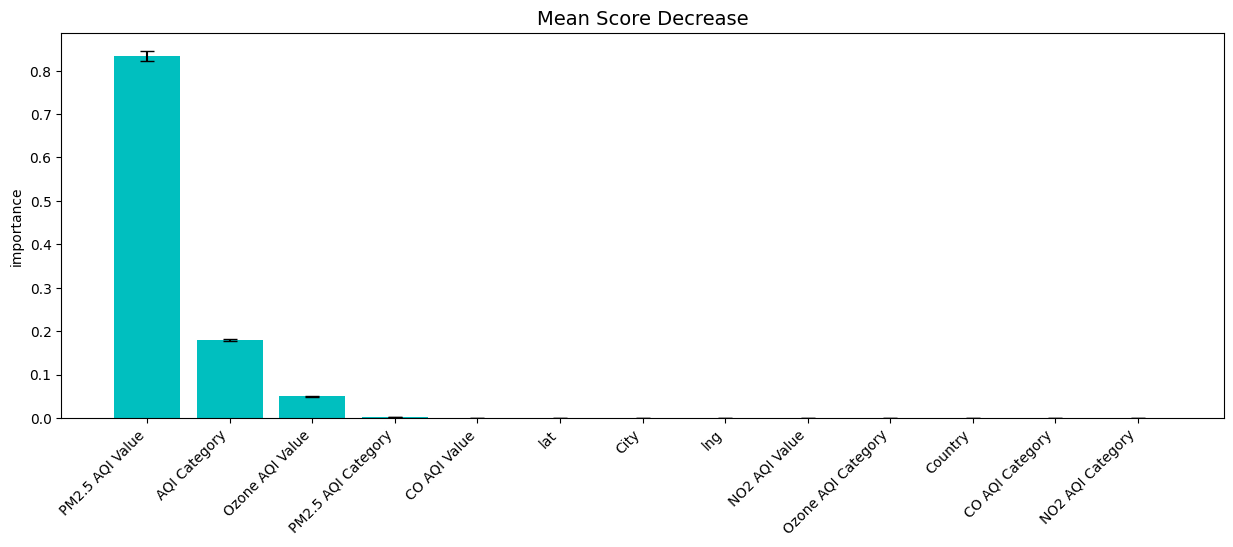

In [37]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

In [38]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Ozone AQI Value', 'PM2.5 AQI Value']),
    ('categoric', cat_pipe(encoder='onehot'), ['AQI Category'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs = -1, random_state = 42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv = 3, n_iter=50, n_jobs = -1, verbose = 1,random_state = 42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.7419203085006956, 'algo__gamma': 1, 'algo__learning_rate': 0.27762530094438326, 'algo__max_depth': 7, 'algo__n_estimators': 113, 'algo__reg_alpha': 0.09444574254983565, 'algo__reg_lambda': 0.12329098365270522, 'algo__subsample': 0.5137705091792748}
0.9999257384134327 0.9984137658814974 0.9976759605674621
